# **Análisis de Texto por medio de TextMining**


Source: [Women Clothes Ecommerce | Kaggle](https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews?select=Womens+Clothing+E-Commerce+Reviews.csv)

## **Lectura de Datos**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
womenEcom  = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/DataScience/womenEcommerce/Copia de Womens Clothing E-Commerce Reviews.csv', encoding='iso8859-1')

## **EDA**

### **Understanding the records**

In [ ]:
womenEcom.head(10)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
7,7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits
8,8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses
9,9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses


In [ ]:
womenEcom.tail(10)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
23476,23476,522,27,Cheeky!,These bottoms are very cute but defiantly chee...,4,1,0,Initmates,Intimate,Swim
23477,23477,1094,39,Entrancing,I'm so impressed with the beautiful color comb...,4,1,5,General Petite,Dresses,Dresses
23478,23478,1104,32,Unflattering,I was surprised at the positive reviews for th...,1,0,0,General Petite,Dresses,Dresses
23479,23479,1005,42,What a fun piece!,So i wasn't sure about ordering this skirt bec...,5,1,0,General Petite,Bottoms,Skirts
23480,23480,862,35,NaN,NaN,5,1,0,General Petite,Tops,Knits
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses
23485,23485,1104,52,Please make more like this one!,This dress in a lovely platinum is feminine an...,5,1,22,General Petite,Dresses,Dresses


### **Data type**

In [ ]:
womenEcom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


### **NULLS per column**

In [ ]:
womenEcom.isnull().sum()

Unnamed: 0                 0
Clothing ID                0
Age                        0
Title                      0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
Negative_Review            0
dtype: int64

In [ ]:
womenEcom = womenEcom.fillna('NAN')

### **Numeric Data**

In [ ]:
numbers = womenEcom.iloc[:, [1,2,3,4,5,6,7,8,9,10]]
numbers.select_dtypes("number")

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
0,767,33,4,1,0
1,1080,34,5,1,4
2,1077,60,3,0,0
3,1049,50,5,1,0
4,847,47,5,1,6
...,...,...,...,...,...
23481,1104,34,5,1,0
23482,862,48,3,1,0
23483,1104,31,3,0,1
23484,1084,28,3,1,2


In [ ]:
numbers.describe()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,918.118709,43.198544,4.196032,0.822362,2.535936
std,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


## **Ratings Plot**

El número de estrellas que más se ha da  en el sitio.

In [ ]:
import matplotlib.pyplot as plt
numbers.rename(columns= {'Positive Feedback Count':'isPositive'}, inplace = True)
numbers.head()

In [ ]:
# Se asume que 0 son negativas
# Se asume que 1 y 2 puede llevar errores
# Se asume que de 3 en adelante, se considera positiva
filteredPositive = numbers[numbers.isPositive > 2]

Text(0, 0.5, 'Quantity')

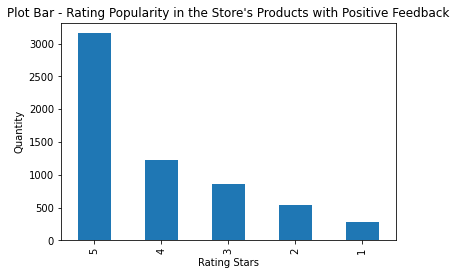

In [ ]:
filteredPositive['Rating'].value_counts().plot.bar()
plt.title("Plot Bar - Rating Popularity in the Store's Products with Positive Feedback")
plt.xlabel('Rating Stars')
plt.ylabel('Quantity')

## **Text Mining**

### **OBJETIVO**

Analizar las palabras más usadas para expresarse en las reviews de los productos de mujer en una ecommerce.

**WORD CLOUD WITHOUT STOP WORDS**

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


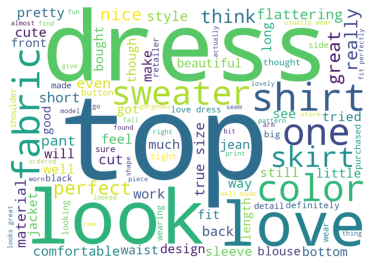

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk 
nltk.download('punkt')
import matplotlib.pyplot as plt

all_words = '' 

for arg in womenEcom['Review Text']: 
    tokens = arg.split()  
    all_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 1000, height = 700, 
                background_color ='white', 
                max_words=100,
                min_font_size = 15).generate(all_words) 

plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

**WORD CLOUD WITH STOP WORDS**

In [ ]:
from PIL import Image
dress_mask = np.array(Image.open("/content/drive/MyDrive/ColabNotebooks/DataScience/womenEcommerce/dress.jpg"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


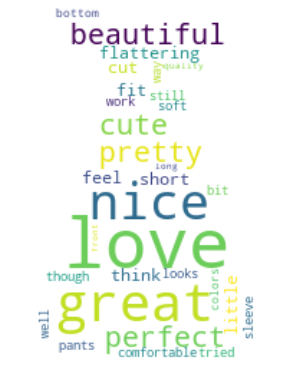

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

womenEcom['Review Text'] = womenEcom['Review Text'].str.lower()
womenEcom['Review Text'] = womenEcom['Review Text'].str.replace('[^\w\s]','')
womenEcom['Review Text'] = womenEcom['Review Text'].str.replace('\d+','')

from nltk import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')

stopwords = set(stopwords.words('english'))
stopwords.update(["dress", "top", "sweater", "shirt", "make", "one", "got", "jacket", "fabric", "botton", "also",
                  "look", "color", "material", "style", "however", "much", "skirt", "bought", "like", "waist", "short"
                  "sleeve", "back", "would", "really", "jean", "pant", "size", "design", "black", "im", "wear", "small"
                  "little", "ordered", "cut" "well", "large", "local", "runs", "run", "person"
                 ])

all_words = '' 

for arg in womenEcom['Review Text']: 
    tokens = arg.split()  
    all_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 1000, height = 700, 
                background_color ='white', 
                stopwords=stopwords,
                mask=dress_mask,
                min_font_size = 5).generate(all_words)
 
# Graficar la imagen del WordCloud                        
plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

### **¿Cuáles son los reviews más utilizados?**

Asumiendo que reviews se refiere a estrellas, la más dada son las 5 stars. Se puede entender que en general la gente le agradan los productos, pero se tendría que revisar a fondo. Si reviews se refiere a las palabras más usadas en los reviews para expresar su sentimeinto sobre la ropa, encontramos que son positivas como "Love", "great",  "nice", "cute", "beautiful", "perfect" y "flattering". 

**Individuales**

In [ ]:
womenEcom['Review Text'] = womenEcom['Review Text'].str.split(' ').apply(lambda x: ' '.join(k for k in x if k not in stopwords))

from collections import Counter
Counter(" ".join(womenEcom['Review Text']).split()).most_common(10)


[('love', 8916),
 ('fit', 7241),
 ('great', 6076),
 ('little', 3771),
 ('perfect', 3731),
 ('flattering', 3484),
 ('soft', 3309),
 ('well', 3236),
 ('comfortable', 3031),
 ('cute', 3018)]

**Conjunto de dos**

In [ ]:
from nltk.util import ngrams

n_gram = 2
n_gram_dic = dict(Counter(ngrams(all_words.split(), n_gram)).most_common(10))

for i in n_gram_dic:
    if n_gram_dic[i] >= 15:
        print(i, n_gram_dic[i])

('looks', 'great') 625
('fit', 'perfectly') 600
('well', 'made') 512
('fits', 'perfectly') 479
('love', 'love') 467
('fit', 'well') 400
('many', 'compliments') 366
('fit', 'great') 360
('highly', 'recommend') 360
('super', 'cute') 358


**Conjunto de tres**

In [ ]:
from nltk.util import ngrams

n_gram = 3
n_gram_dic = dict(Counter(ngrams(all_words.split(), n_gram)).most_common(10))

for i in n_gram_dic:
    if n_gram_dic[i] >= 15:
        print(i, n_gram_dic[i])

('received', 'many', 'compliments') 166
('love', 'love', 'love') 145
('first', 'time', 'wore') 69
('looks', 'great', 'jeans') 66
('looking', 'forward', 'wearing') 56
('compliments', 'every', 'time') 53
('great', 'skinny', 'jeans') 52
('wish', 'came', 'colors') 50
('worth', 'every', 'penny') 46
('looks', 'better', 'person') 43


### **¿Cómo aplicarías tus resultados en un entorno de negocio o un proyecto considerando la base de datos de la actividad?**

Aplicaría mis resultados en el copywritting al momento de redactar la descripción de los productos para que las personas compran se sientan identificadas con las palabras usadas como el lenguaje que ellas manejan. Además, esto mismo se podría aplicar en la redacción de los correos que envía la empresa a sus clientes, es decir las SALES letter podrían aprovechar las palabras e incluirlas. Además se puede usar para buscar las reviews más destacadas y priorizarlas hasta arriba de cada producto. 

### **3 Cosas que puede cambiar la empresa basándose en el análisis**

1) Describir los productos con base a como se verá la persona, lo que le dirán los demás y como el valor de la misma prenda justifica el precio.

2) Mientras limpiaba y creaba el stopword, noté que mucha gente se quejaba del tamaño de la ropa, así que algo que podrían buscar es mejorar la manera de presentar el tamaño de la prenda para que el cliente pueda evaluar antes de comprar cual sería su talla correcta.

3) Ver que productos necesitan variedad de color, porque mientras hacia el stopwords salían muchas personas pidiendo variedad de color.

**Selección de Propuesta**

Seleccioné enfocarme en las reviews positivas porque quería ver que palabras se podrían incluir en el marketing de la empresa, el copywritting necesita saber venderse al cliente, entender como se comunica para poder hacer los textos del website tanto descripciones, como de los anuncios, etc. Analizar las reviews es una buena oportunidad de profundizar sobre ese entendimiento y reaplicarlo en algo útil. 

**¿Se podría medir el impacto desde una perspectiva ética, social, ambiental y/o económica? Justifica tu respuesta. En el caso de ser negativa la respuesta, ¿Qué información necesitarías para poder medir este impacto?**

¿Se podría medir el impacto económica de aplicar las palabras encontradas en el copywritting de la empresa? Probablemente se visualizaría al menos en una menor tasa de rebote y con el tiempo se podría ver un incremento hacia la pasarela de pago, ya que se levantarían menos red flags en el consumidor. Lo correcto sería ir implementando los cambios de redacción poco a poco para ir midiendo como estos cambios perjudican, benefician o no alteran en los pasos hacia la venta. Se podría utilizar el porcentaje de caída en cada etapa hacia el pago desde que el cliente entra a la página web.

**Datos que podrían apoyar el análisis**

* Palabras de los comments en las redes sociales de las empresas
* Palabras de los Emails de los clientes
* Palabras en encuestas a los clientes